In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
disp = pd.ExcelFile('DISP.xlsx')

In [4]:
va = pd.read_excel(disp, 'Virginia', parse_dates=['Ship Date'])

In [5]:
va.head()

,State,Station Name (LEA),NSN,Item Name,Quantity,UI,Acquisition Value,DEMIL Code,DEMIL IC,Ship Date,Station Type
0,VA,ACCOMACK COUNTY SHERIFF DEPT,6720-01-568-2071,"CAMERA SYSTEM,RECONNAISSANCE",1,Kit,8450.0,C,1.0,2014-07-24,State
1,VA,ALBEMARLE COUNTY POLICE DEPT,5855-01-138-4749,"IMAGE INTENSIFIER,NIGHT VISION",1,Each,10747.0,F,1.0,2013-04-11,State
2,VA,ALBEMARLE COUNTY POLICE DEPT,1005-00-856-6885,"RIFLE,5.56 MILLIMETER",1,Each,120.0,D,1.0,2011-09-28,State
3,VA,ALBEMARLE COUNTY POLICE DEPT,1005-00-073-9421,"RIFLE,5.56 MILLIMETER",1,Each,499.0,D,1.0,2004-06-29,State
4,VA,ALBEMARLE COUNTY POLICE DEPT,1005-00-073-9421,"RIFLE,5.56 MILLIMETER",1,Each,499.0,D,1.0,2012-11-26,State


In [6]:
va_clean = va.loc[:, ('Quantity', 'Acquisition Value', 'Ship Date')]

In [7]:
va_clean['Total Value'] = va_clean['Quantity'] * va_clean['Acquisition Value']

In [8]:
va_clean['Year'] = va_clean['Ship Date'].dt.year

In [9]:
va_clean = va_clean.loc[:, ('Year', 'Total Value')]

In [10]:
va_clean = va_clean.sort_values('Year')

In [29]:
yearly_totals = va_clean.groupby('Year').sum()
yearly_totals['Total Value'] = yearly_totals['Total Value'] / 1000000

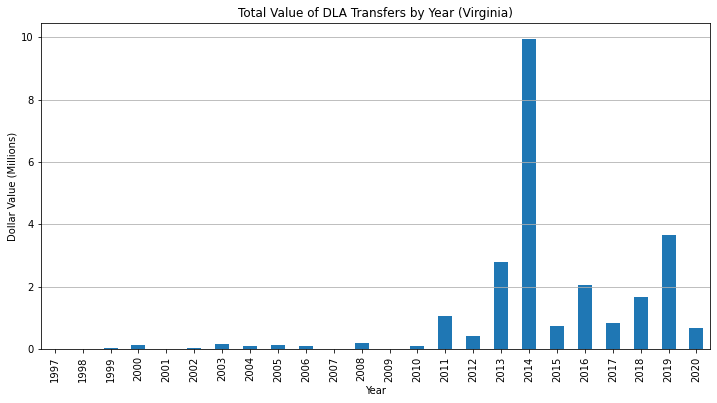

In [34]:
yearly_totals.plot(kind='bar', figsize=(12,6), legend=False)
plt.title('Total Value of DLA Transfers by Year (Virginia)')
plt.ylabel('Dollar Value (Millions)')
plt.xlabel('Year')
plt.grid(axis='y')
plt.savefig('Virginia_by_year')

In [33]:
yearly_totals['Total Value'].sum()

25.10195805